In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [10]:
df_train = pd.read_csv("/kaggle/input/training-set-features/training_set_features.csv")
df_train.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [11]:
df_test = pd.read_csv("/kaggle/input/test-set-features/test_set_features.csv")
df_test.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [12]:
df_id = df_test['respondent_id']

In [13]:
y = y=pd.read_csv('/kaggle/input/training-set-labels/training_set_labels.csv')
y.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [14]:
train=pd.merge(df_train,y,on='respondent_id')
train.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [15]:
train=train.drop(['seasonal_vaccine','respondent_id','doctor_recc_seasonal','opinion_seas_sick_from_vacc','opinion_seas_risk','opinion_seas_vacc_effective'],axis=1)
train.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [16]:
test=df_test.drop(['respondent_id','respondent_id','doctor_recc_seasonal','opinion_seas_sick_from_vacc','opinion_seas_risk','opinion_seas_vacc_effective'],axis=1)
test.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [17]:
train.nunique().sort_values(ascending=False)

employment_occupation          23
employment_industry            21
hhs_geo_region                 10
opinion_xyz_sick_from_vacc      5
opinion_xyz_vacc_effective      5
age_group                       5
opinion_xyz_risk                5
household_children              4
household_adults                4
race                            4
education                       4
xyz_concern                     4
xyz_knowledge                   3
census_msa                      3
income_poverty                  3
employment_status               3
health_worker                   2
rent_or_own                     2
behavioral_antiviral_meds       2
behavioral_avoidance            2
behavioral_face_mask            2
behavioral_wash_hands           2
behavioral_large_gatherings     2
marital_status                  2
health_insurance                2
sex                             2
behavioral_outside_home         2
behavioral_touch_face           2
doctor_recc_xyz                 2
chronic_med_co

In [18]:
train.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status                  object
rent_or_own                     object
employment_status               object
hhs_geo_region           

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26615 non-null  float64
 1   xyz_knowledge                26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  chronic_med_condition        25736 non-null  float64
 11  child_under_6_months         25887 non-null  float64
 12  health_worker                25903 non-null  float64
 13  health_insurance

In [20]:
round(train.isnull().sum()*100/len(train),2).sort_values(ascending=False)

employment_occupation          50.44
employment_industry            49.91
health_insurance               45.96
income_poverty                 16.56
doctor_recc_xyz                 8.09
rent_or_own                     7.65
employment_status               5.48
marital_status                  5.27
education                       5.27
chronic_med_condition           3.64
child_under_6_months            3.07
health_worker                   3.01
opinion_xyz_sick_from_vacc      1.48
opinion_xyz_vacc_effective      1.46
opinion_xyz_risk                1.45
household_adults                0.93
household_children              0.93
behavioral_avoidance            0.78
behavioral_touch_face           0.48
xyz_knowledge                   0.43
xyz_concern                     0.34
behavioral_large_gatherings     0.33
behavioral_outside_home         0.31
behavioral_antiviral_meds       0.27
behavioral_wash_hands           0.16
behavioral_face_mask            0.07
sex                             0.00
r

In [21]:
round(test.isnull().sum()*100/len(test),2).sort_values(ascending=False)

employment_occupation          50.27
employment_industry            49.70
health_insurance               45.78
income_poverty                 16.84
doctor_recc_xyz                 8.09
rent_or_own                     7.62
employment_status               5.51
marital_status                  5.40
education                       5.27
chronic_med_condition           3.49
child_under_6_months            3.04
health_worker                   2.95
opinion_xyz_vacc_effective      1.49
opinion_xyz_risk                1.42
opinion_xyz_sick_from_vacc      1.40
household_children              0.84
household_adults                0.84
behavioral_avoidance            0.80
behavioral_touch_face           0.48
xyz_knowledge                   0.46
xyz_concern                     0.32
behavioral_outside_home         0.31
behavioral_antiviral_meds       0.30
behavioral_large_gatherings     0.27
behavioral_wash_hands           0.15
behavioral_face_mask            0.07
sex                             0.00
r

In [22]:
train=train.drop(['employment_occupation', 'employment_industry'],axis=1)
test=test.drop(['employment_occupation', 'employment_industry'],axis=1)

In [23]:
train['xyz_concern'].unique()

array([ 1.,  3.,  2.,  0., nan])

In [24]:
train['xyz_concern'].value_counts()

xyz_concern
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64

In [25]:
test['xyz_concern'].value_counts()

xyz_concern
2.0    10743
1.0     8158
3.0     4523
0.0     3199
Name: count, dtype: int64

In [26]:
train['xyz_knowledge'].value_counts()

xyz_knowledge
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64

In [27]:
test['xyz_knowledge'].value_counts()

xyz_knowledge
1.0    14629
2.0     9515
0.0     2442
Name: count, dtype: int64

In [28]:
train['opinion_xyz_vacc_effective'].unique()

array([ 3.,  5.,  4.,  2.,  1., nan])

In [29]:
test['opinion_xyz_vacc_effective'].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [30]:
train['age_group'].value_counts()

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [31]:
train['age_group']=train['age_group'].replace({'55 - 64 Years':3, '35 - 44 Years':1, '18 - 34 Years':0, '65+ Years':4,
       '45 - 54 Years':2})

In [32]:
test['age_group']=test['age_group'].replace({'55 - 64 Years':3, '35 - 44 Years':1, '18 - 34 Years':0, '65+ Years':4,
       '45 - 54 Years':2})

In [33]:
train['education'].value_counts()

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

In [34]:
train['education']=train['education'].replace({'< 12 Years':0, '12 Years':1, 'College Graduate':3, 'Some College':2})

In [35]:
test['education']=test['education'].replace({'< 12 Years':0, '12 Years':1, 'College Graduate':3, 'Some College':2})

In [36]:
train['race'].value_counts()

race
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: count, dtype: int64

In [37]:
train['race'] = train['race'].replace({'White':1, 'Black':2, 'Hispanic':3, 'Other or Multiple':4})

In [38]:
test['race'] = test['race'].replace({'White':1, 'Black':2, 'Hispanic':3, 'Other or Multiple':4})

In [39]:
train['sex'].value_counts()

sex
Female    15858
Male      10849
Name: count, dtype: int64

In [40]:
train['sex'] = train['sex'].replace({'Female':1, 'Male':0})

In [41]:
test['sex'] = test['sex'].replace({'Female':1, 'Male':0})

In [42]:
train['income_poverty'].value_counts()

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [43]:
train['income_poverty'] = train['income_poverty'].replace({'<= $75,000, Above Poverty':2, '> $75,000':1, 'Below Poverty':0})

In [44]:
test['income_poverty'] = test['income_poverty'].replace({'<= $75,000, Above Poverty':2, '> $75,000':1, 'Below Poverty':0})

In [45]:
train['marital_status'].value_counts()

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

In [46]:
train['marital_status']=train['marital_status'].replace({'Married':1, 'Not Married':0})

In [47]:
test['marital_status']=test['marital_status'].replace({'Married':1, 'Not Married':0})

In [48]:
train['rent_or_own'].value_counts()

rent_or_own
Own     18736
Rent     5929
Name: count, dtype: int64

In [49]:
train['rent_or_own'] = train['rent_or_own'].replace({'Own':1, 'Rent':0})

In [50]:
test['rent_or_own'] = test['rent_or_own'].replace({'Own':1, 'Rent':0})

In [51]:
train['employment_status'].value_counts()

employment_status
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64

In [52]:
train['employment_status'] = train['employment_status'].replace({'Employed':1, 'Unemployed':0, 'Not in Labor Force':2})

In [53]:
test['employment_status'] = test['employment_status'].replace({'Employed':1, 'Unemployed':0, 'Not in Labor Force':2})

In [54]:
train['hhs_geo_region'].value_counts()

hhs_geo_region
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: count, dtype: int64

In [55]:
train['hhs_geo_region'] = train['hhs_geo_region'].replace({'lzgpxyit':0, 'fpwskwrf':1, 'qufhixun':2, 'oxchjgsf':3, 'kbazzjca':4, 'bhuqouqj':5, 'mlyzmhmf':6, 'lrircsnp':7, 'atmpeygn':8, 'dqpwygqj':9})

In [56]:
test['hhs_geo_region'] = test['hhs_geo_region'].replace({'lzgpxyit':0, 'fpwskwrf':1, 'qufhixun':2, 'oxchjgsf':3, 'kbazzjca':4, 'bhuqouqj':5, 'mlyzmhmf':6, 'lrircsnp':7, 'atmpeygn':8, 'dqpwygqj':9})


In [57]:
train['census_msa'].value_counts()

census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64

In [58]:
train['census_msa'] = train['census_msa'].replace({'MSA, Not Principle  City':0, 'MSA, Principle City':1,'Non-MSA':2})

In [59]:
test['census_msa'] = test['census_msa'].replace({'MSA, Not Principle  City':0, 'MSA, Principle City':1,'Non-MSA':2})

In [60]:
train.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
age_group                        int64
education                      float64
race                             int64
sex                              int64
income_poverty                 float64
marital_status                 float64
rent_or_own                    float64
employment_status              float64
hhs_geo_region           

In [61]:
test.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
age_group                        int64
education                      float64
race                             int64
sex                              int64
income_poverty                 float64
marital_status                 float64
rent_or_own                    float64
employment_status              float64
hhs_geo_region           

In [62]:
round(train.isnull().sum()*100/len(train),2).sort_values(ascending=False)

health_insurance               45.96
income_poverty                 16.56
doctor_recc_xyz                 8.09
rent_or_own                     7.65
employment_status               5.48
marital_status                  5.27
education                       5.27
chronic_med_condition           3.64
child_under_6_months            3.07
health_worker                   3.01
opinion_xyz_sick_from_vacc      1.48
opinion_xyz_vacc_effective      1.46
opinion_xyz_risk                1.45
household_adults                0.93
household_children              0.93
behavioral_avoidance            0.78
behavioral_touch_face           0.48
xyz_knowledge                   0.43
xyz_concern                     0.34
behavioral_large_gatherings     0.33
behavioral_outside_home         0.31
behavioral_antiviral_meds       0.27
behavioral_wash_hands           0.16
behavioral_face_mask            0.07
race                            0.00
sex                             0.00
age_group                       0.00
h

In [63]:
round(test.isnull().sum()*100/len(test),2).sort_values(ascending=False)

health_insurance               45.78
income_poverty                 16.84
doctor_recc_xyz                 8.09
rent_or_own                     7.62
employment_status               5.51
marital_status                  5.40
education                       5.27
chronic_med_condition           3.49
child_under_6_months            3.04
health_worker                   2.95
opinion_xyz_vacc_effective      1.49
opinion_xyz_risk                1.42
opinion_xyz_sick_from_vacc      1.40
household_adults                0.84
household_children              0.84
behavioral_avoidance            0.80
behavioral_touch_face           0.48
xyz_knowledge                   0.46
xyz_concern                     0.32
behavioral_outside_home         0.31
behavioral_antiviral_meds       0.30
behavioral_large_gatherings     0.27
behavioral_wash_hands           0.15
behavioral_face_mask            0.07
age_group                       0.00
race                            0.00
sex                             0.00
h

In [64]:
imp1 = SimpleImputer(strategy='most_frequent')
train['health_insurance'] = imp1.fit_transform(train[['health_insurance']])
train['income_poverty'] = imp1.fit_transform(train[['income_poverty']])
train['doctor_recc_xyz'] = imp1.fit_transform(train[['doctor_recc_xyz']])
train['rent_or_own'] = imp1.fit_transform(train[['rent_or_own']])
train['employment_status'] = imp1.fit_transform(train[['employment_status']])
train['marital_status'] = imp1.fit_transform(train[['marital_status']])
train['education'] = imp1.fit_transform(train[['education']])
train['chronic_med_condition'] = imp1.fit_transform(train[['chronic_med_condition']])
train['child_under_6_months'] = imp1.fit_transform(train[['child_under_6_months']])
train['health_worker'] = imp1.fit_transform(train[['health_worker']])
train['opinion_xyz_vacc_effective'] = imp1.fit_transform(train[['opinion_xyz_vacc_effective']])
train['opinion_xyz_risk'] = imp1.fit_transform(train[['opinion_xyz_risk']])
train['opinion_xyz_sick_from_vacc'] = imp1.fit_transform(train[['opinion_xyz_sick_from_vacc']])
train['household_adults'] = imp1.fit_transform(train[['household_adults']])
train['household_children'] = imp1.fit_transform(train[['household_children']])
train['behavioral_avoidance'] = imp1.fit_transform(train[['behavioral_avoidance']])
train['behavioral_touch_face'] = imp1.fit_transform(train[['behavioral_touch_face']])
train['xyz_knowledge'] = imp1.fit_transform(train[['xyz_knowledge']])
train['xyz_concern'] = imp1.fit_transform(train[['xyz_concern']])
train['behavioral_outside_home'] = imp1.fit_transform(train[['behavioral_outside_home']])
train['behavioral_antiviral_meds'] = imp1.fit_transform(train[['behavioral_antiviral_meds']])
train['behavioral_large_gatherings'] = imp1.fit_transform(train[['behavioral_large_gatherings']])
train['behavioral_wash_hands'] = imp1.fit_transform(train[['behavioral_wash_hands']])
train['behavioral_face_mask'] = imp1.fit_transform(train[['behavioral_face_mask']])

In [65]:
round(train.isnull().sum()*100/len(train),2).sort_values(ascending=False)

xyz_concern                    0.0
xyz_knowledge                  0.0
household_children             0.0
household_adults               0.0
census_msa                     0.0
hhs_geo_region                 0.0
employment_status              0.0
rent_or_own                    0.0
marital_status                 0.0
income_poverty                 0.0
sex                            0.0
race                           0.0
education                      0.0
age_group                      0.0
opinion_xyz_sick_from_vacc     0.0
opinion_xyz_risk               0.0
opinion_xyz_vacc_effective     0.0
health_insurance               0.0
health_worker                  0.0
child_under_6_months           0.0
chronic_med_condition          0.0
doctor_recc_xyz                0.0
behavioral_touch_face          0.0
behavioral_outside_home        0.0
behavioral_large_gatherings    0.0
behavioral_wash_hands          0.0
behavioral_face_mask           0.0
behavioral_avoidance           0.0
behavioral_antiviral

In [66]:
test['health_insurance'] = imp1.fit_transform(test[['health_insurance']])
test['income_poverty'] = imp1.fit_transform(test[['income_poverty']])
test['doctor_recc_xyz'] = imp1.fit_transform(test[['doctor_recc_xyz']])
test['rent_or_own'] = imp1.fit_transform(test[['rent_or_own']])
test['employment_status'] = imp1.fit_transform(test[['employment_status']])
test['marital_status'] = imp1.fit_transform(test[['marital_status']])
test['education'] = imp1.fit_transform(test[['education']])
test['chronic_med_condition'] = imp1.fit_transform(test[['chronic_med_condition']])
test['child_under_6_months'] = imp1.fit_transform(test[['child_under_6_months']])
test['health_worker'] = imp1.fit_transform(test[['health_worker']])
test['opinion_xyz_vacc_effective'] = imp1.fit_transform(test[['opinion_xyz_vacc_effective']])
test['opinion_xyz_risk'] = imp1.fit_transform(test[['opinion_xyz_risk']])
test['opinion_xyz_sick_from_vacc'] = imp1.fit_transform(test[['opinion_xyz_sick_from_vacc']])
test['household_adults'] = imp1.fit_transform(test[['household_adults']])
test['household_children'] = imp1.fit_transform(test[['household_children']])
test['behavioral_avoidance'] = imp1.fit_transform(test[['behavioral_avoidance']])
test['behavioral_touch_face'] = imp1.fit_transform(test[['behavioral_touch_face']])
test['xyz_knowledge'] = imp1.fit_transform(test[['xyz_knowledge']])
test['xyz_concern'] = imp1.fit_transform(test[['xyz_concern']])
test['behavioral_outside_home'] = imp1.fit_transform(test[['behavioral_outside_home']])
test['behavioral_antiviral_meds'] = imp1.fit_transform(test[['behavioral_antiviral_meds']])
test['behavioral_large_gatherings'] = imp1.fit_transform(test[['behavioral_large_gatherings']])
test['behavioral_wash_hands'] = imp1.fit_transform(test[['behavioral_wash_hands']])
test['behavioral_face_mask'] = imp1.fit_transform(test[['behavioral_face_mask']])

In [67]:
round(test.isnull().sum()*100/len(test),2).sort_values(ascending=False)

xyz_concern                    0.0
opinion_xyz_risk               0.0
household_adults               0.0
census_msa                     0.0
hhs_geo_region                 0.0
employment_status              0.0
rent_or_own                    0.0
marital_status                 0.0
income_poverty                 0.0
sex                            0.0
race                           0.0
education                      0.0
age_group                      0.0
opinion_xyz_sick_from_vacc     0.0
opinion_xyz_vacc_effective     0.0
xyz_knowledge                  0.0
health_insurance               0.0
health_worker                  0.0
child_under_6_months           0.0
chronic_med_condition          0.0
doctor_recc_xyz                0.0
behavioral_touch_face          0.0
behavioral_outside_home        0.0
behavioral_large_gatherings    0.0
behavioral_wash_hands          0.0
behavioral_face_mask           0.0
behavioral_avoidance           0.0
behavioral_antiviral_meds      0.0
household_children  

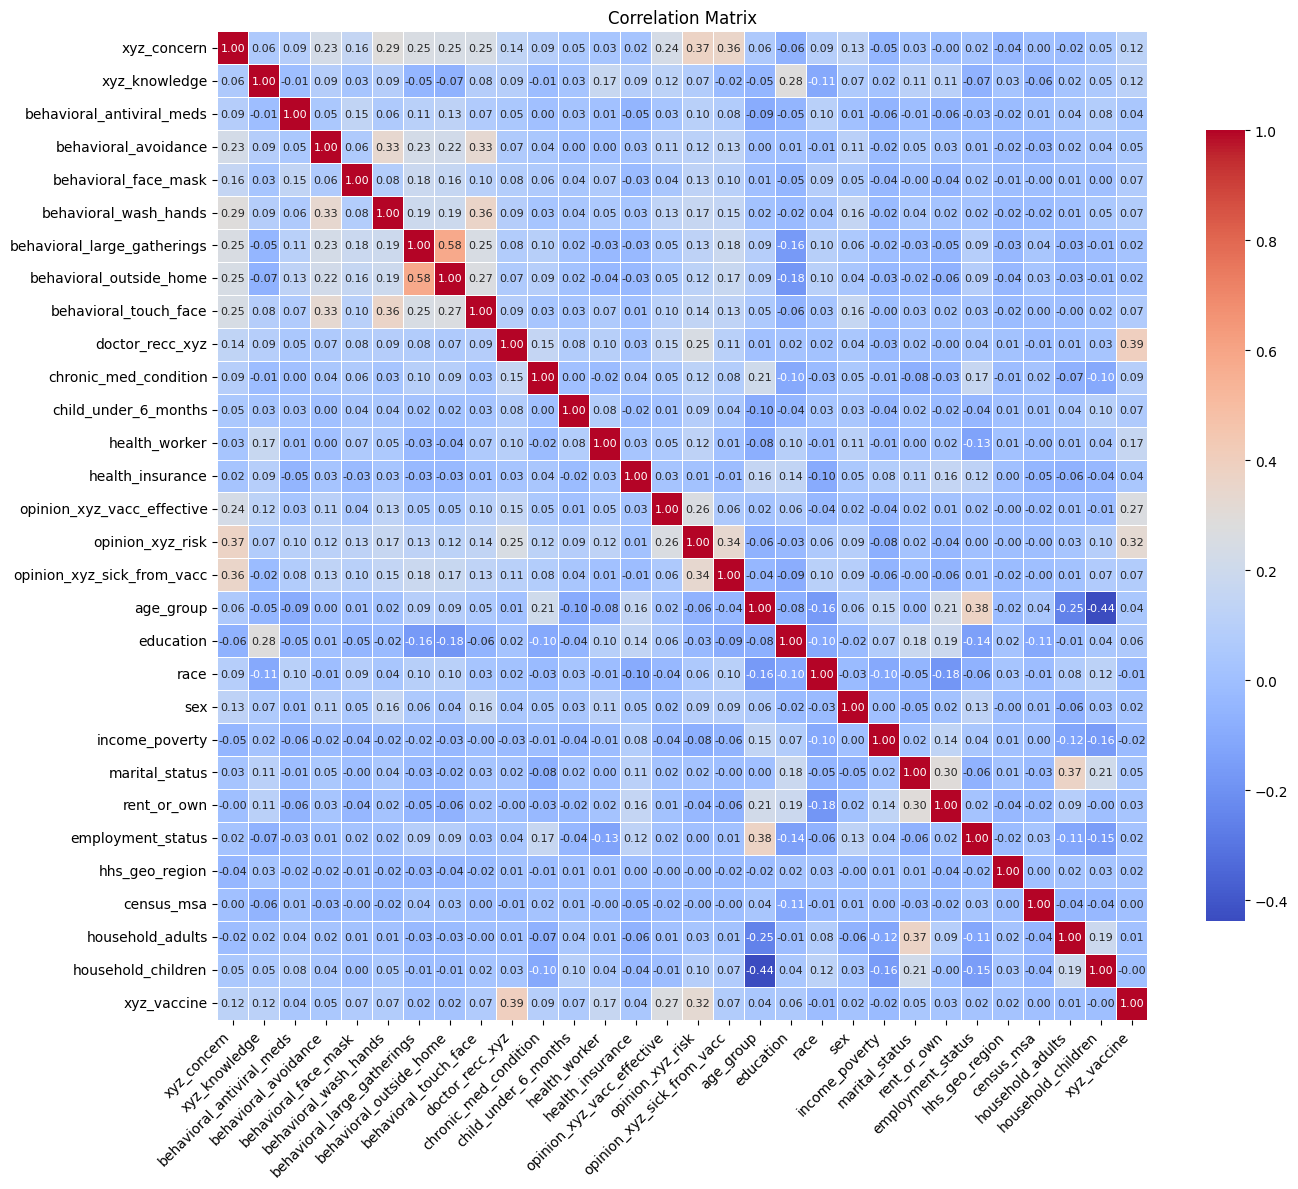

In [68]:
corr_matrix = train.corr()
plt.figure(figsize=(14, 12))  
heatmap = sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5, 
    annot_kws={"size": 8},  
    cbar_kws={'shrink': 0.8})  
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.title('Correlation Matrix')
plt.tight_layout() 
plt.show()

In [ ]:
train.drop(['household_children','census_msa'], axis=1, inplace=True)
test.drop(['household_children','census_msa'], axis=1, inplace=True)

In [70]:
train.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,household_adults,xyz_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1,1,0.0,0.0,1.0,2.0,3,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1,0,0.0,0.0,0.0,1.0,5,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1,0,2.0,0.0,1.0,1.0,2,2.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1,1,0.0,0.0,0.0,2.0,7,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,1,1,2.0,1.0,1.0,1.0,2,1.0,0


In [74]:
# Separate the target variable
y = train['xyz_vaccine']

# Drop the target variable from the feature set without using inplace=True
X = train.drop(['xyz_vaccine'], axis=1)

In [75]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)

In [76]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21365, 27), (5342, 27), (21365,), (5342,))

In [77]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

In [78]:
results_list = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Collect the results in a dictionary
    results_list.append({
        "Classifier": name,
        "ROC AUC": roc_auc,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert the list of dictionaries to a DataFrame
results = pd.DataFrame(results_list)

print(results)

            Classifier   ROC AUC  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.816284  0.833021   0.672831  0.416740  0.514690
1        Decision Tree  0.625011  0.738300   0.393522  0.428194  0.410127
2        Random Forest  0.807920  0.831898   0.670014  0.411454  0.509825
3    Gradient Boosting  0.824472  0.834893   0.669799  0.439648  0.530851
4                  SVM  0.808268  0.833209   0.698697  0.377974  0.490566
5  K-Nearest Neighbors  0.720746  0.808124   0.595156  0.303084  0.401635
6          Naive Bayes  0.765832  0.759266   0.449295  0.589427  0.509909


In [79]:
best_gb_clf = GradientBoostingClassifier()

In [80]:
best_gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [81]:
y_pred_proba = best_gb_clf.predict_proba(test)[:, 1]

In [82]:
y_pred = best_gb_clf.predict(test)

In [84]:
submission = pd.DataFrame({
    'respondent_id': df_id,
    'h1n1_vaccine': y_pred
})

# Save the submission DataFrame to a CSV file
submission.to_csv('h1n1_vaccine_prediction.csv', index=False)